First, we need to install Cool Prop library. In Google Collab you can easily do it by usnig the following command.

In [2]:
!pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.9 MB/s eta 0:00:00


Then, we have to import all needed the libraries. A library can be imported using import statement:

`import {Name of libabry} as {shorter name}`

You can also import specific modules or functions from a library:

`from  {Name of libabry} import {Module}`




In [ ]:
import numpy as np
import matplotlib.pyplot as pl
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot

# 1- Thermodynamic Properties


One of the main skills that every student should master is to find the values of different properties from table of properties. This skill is specially important when wone wants to determine the state of a system on a diagram.

Different values for different properties can be found using CoolProp.  From homework 5 we had:


State | T(C) | P(kPa) | v(m3/s) | x | Phase
----------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
(a) |140 | ? | 0.28 | ? | ? |
(b) |140 | 700 | ? | ? | ? |
(c) |350 | 800 | ? | ? | ? |
(d) |120 | ? | ? | 0.7 | ? |

To obtain any properies, one need to use the following format:

`CP.PropsSI('target property',  '1st given proprty',  2nd value of givern proprty,  '2nd given proprty', value of  2nd givern proprty ,'Material')`

In [ ]:
#State (a)
print ("State a:")
print("====================")
P_a= CP.PropsSI('P',  'T',  140+273.15,  'D', 1.0/0.28 ,'water')
print ('\t','P_a=', P_a/1000 ,'kPa')

x_a= CP.PropsSI('Q',  'T',  140+273.15,  'D', 1.0/0.28 ,'water')
print ('\t','x_a=', x_a)

print ('\t',"Phase description: ",CP.PhaseSI('T',140+273.15,'D',1.0/0.28,'Water'))

#State (b)
print ("State b:")
print("====================")
D_b= CP.PropsSI('D',  'T',  140+273.15,  'P', 700e3 ,'water')
print ('\t','v_b=', 1/D_b , 'm3/kg' )

x_b= CP.PropsSI('Q',  'T',  140+273.15,  'P', 700e3 ,'water')
print ('\t','x_b=', x_b)

print ('\t',"Phase description: ",CP.PhaseSI('T',  140+273.15,  'P', 700e3,'Water'))

#State (c)
print ("State c:")
print("====================")
D_c= CP.PropsSI('D',  'T',  350+273.15,  'P', 800e3 ,'water')
print ('\t','v_c=', 1/D_c , 'm3/kg' )

x_c= CP.PropsSI('Q',  'T',  350+273.15,  'P', 800e3 ,'water')
print ('\t','x_c=', x_c)

print ('\t',"Phase description: ",CP.PhaseSI('T',  350+273.15,  'P', 800e3,'Water'))


#State (d)
print ("State d:")
print("====================")
P_d= CP.PropsSI('P',  'T',  120+273.15,  'Q', 0.7 ,'water')
print ('\t','P_d=', P_d/1000 ,'kPa')

D_d= CP.PropsSI('D',  'T',  120+273.15,  'Q', 0.7 ,'water')
print ('\t','v_d=', 1/D_d)

print ('\t',"Phase description: ",CP.PhaseSI('T',120+273.15,'Q', 0.7, 'Water'))

State a:
	 P_a= 361.5390993988951 kPa
	 x_a= 0.5497324101098541
	 Phase description:  twophase
State b:
	 v_b= 0.0010795427146345204 m3/kg
	 x_b= -1.0
	 Phase description:  liquid
State c:
	 v_c= 0.35442327414048347 m3/kg
	 x_c= -1.0
	 Phase description:  gas
State d:
	 P_d= 198.67442047958036 kPa
	 v_d= 0.62416665604225
	 Phase description:  twophase


<ipython-input-139-1748b022058a>:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([1e-4, 50 , 0, 700])


Text(0.0008795427146345204, 0.7, '(b)')

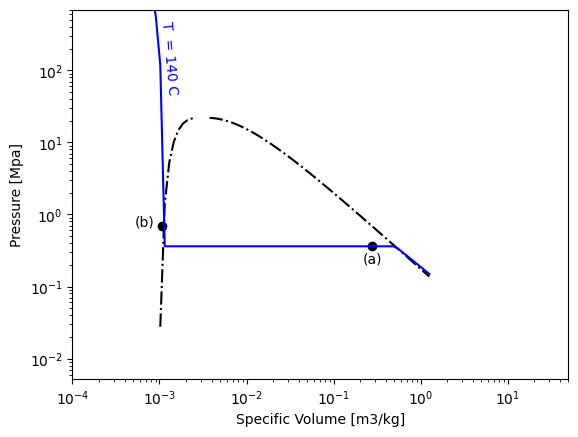

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot



specific_volume= np.logspace (-5, 0.1, 100)
density= 1/ specific_volume

# Constant temperature line at 400 C
T1=140+273.15
P1=CP.PropsSI('P', 'D', density, 'Q' , 1, 'water')
P2=CP.PropsSI('P', 'D', density, 'Q' , 0, 'water')

plt.loglog(specific_volume, P1/1e6, linestyle="dashdot", color='black')
plt.loglog(specific_volume, P2/1e6, linestyle="dashdot", color='black')

P3=CP.PropsSI('P', 'D', density, 'T' ,T1 , 'water')
plt.loglog(specific_volume, P3/1e6, color= "blue")



plt.xlabel("Specific Volume [m3/kg]")
plt.ylabel("Pressure [Mpa]")

plt.axis([1e-4, 50 , 0, 700])
plt.scatter(0.28 , P_a/1e6, color= "black")
plt.annotate("(a)", (0.28 , (P_a/1e6)-0.15), ha='center', color= "black")
plt.annotate("T  = 140 C", (1e-3 , 0.5e2), ha='left', color= "blue", rotation=-85)


plt.scatter(1/D_b , 700000/1e6, color= "black")
plt.annotate("(b)", ((1/D_b)-0.0002 , (700000/1e6)), ha='right', color= "black")



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot



specific_volume= np.logspace (-3, 1, 100)
density= 1/ specific_volume

# Constant temperature line at 400 C
T1=400+273.15
P1=CP.PropsSI('P', 'D', density, 'T' , T1, 'water')
pl.loglog(specific_volume, P1/1e6)

# Constant temperature line at 300 C
T2=300+273.15
P2=CP.PropsSI('P', 'D', density, 'T' , T2, 'water')
pl.loglog(specific_volume, P2/1e6)

# Constant temperature line at 200 C
T3=200+273.15
P3=CP.PropsSI('P', 'D', density, 'T' , T3, 'water')
pl.loglog(specific_volume, P3/1e6)
# Constant temperature line at 100 C

T4=100+273.15
P4=CP.PropsSI('P', 'D', density, 'T' , T4, 'water')

pl.loglog(specific_volume, P4/1e6)


pl.xlabel("Specific Volume [m^3/kg]")
pl.ylabel("Pressure [Mpa]")

plt.scatter(T4, P4)

ModuleNotFoundError: No module named 'CoolProp'

<ipython-input-13-dd5a238cb7dd>:25: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  pl.axis([0, 10 , 0, 1000])
<ipython-input-13-dd5a238cb7dd>:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  pl.axis([0, 10 , 0, 1000])


(0.000630957344480193, 10.0, 206.8618881653163, 1000.0)

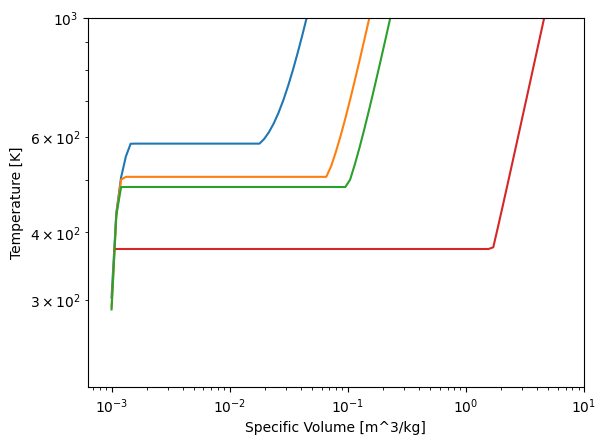

In [ ]:
specific_volume= np.logspace (-3, 1, 100)
density= 1/ specific_volume

# Constant temperature line at 400 kPa
P1=10000e3
T1=CP.PropsSI('T', 'D', density, 'P' , P1, 'water')
pl.loglog(specific_volume, T1)
# Constant temperature line at 300 C
P2=3000e3
T2=CP.PropsSI('T', 'D', density, 'P' , P2, 'water')
pl.loglog(specific_volume, T2)
# Constant temperature line at 200 C
P3=2000e3
T3=CP.PropsSI('T', 'D', density, 'P' , P3, 'water')
pl.loglog(specific_volume, T3)
# Constant temperature line at 100 C
P4=100e3
T4=CP.PropsSI('T', 'D', density, 'P' , P4, 'water')
pl.loglog(specific_volume, T4)


pl.xlabel("Specific Volume [m^3/kg]")
pl.ylabel("Temperature [K]")

pl.axis([0, 10 , 0, 1000])

#from CoolProp.Plots import PropertyPlot
#pp = PropertyPlot('HEOS::water', 'TD', unit_system='EUR')


In [ ]:
from __future__ import print_function

import CoolProp

from CoolProp.Plots import StateContainer

T0 = 300.000; p0 = 200000.000; h0 = 112745.749; s0 = 393.035

cycle_states = StateContainer()

cycle_states[0,'H'] = h0

cycle_states[0]['S'] = s0

cycle_states[0][CoolProp.iP] = p0

cycle_states[0,CoolProp.iT] = T0

cycle_states[1,"T"] = 300.064

print(cycle_states)


Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    0      300.000   200000.000            -   112745.749      393.035
    1      300.064            -            -            -            -



/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Plots.py:301: UserWarning: You called the function "draw_process", which is not tested.
  warnings.warn("You called the function \"draw_process\", which is not tested.", UserWarning)
/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


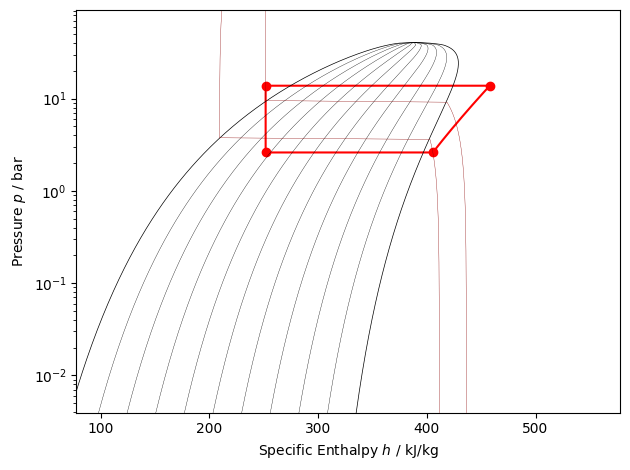

In [ ]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
pp.calc_isolines(CoolProp.iQ, num=11)
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')
T0 = 280
pp.state.update(CoolProp.QT_INPUTS,0.0,T0-10)
p0 = pp.state.keyed_output(CoolProp.iP)
T2 = 310
pp.state.update(CoolProp.QT_INPUTS,1.0,T2+15)
p2 = pp.state.keyed_output(CoolProp.iP)
pp.calc_isolines(CoolProp.iT, [T0-273.15,T2-273.15], num=2)
cycle.simple_solve(T0, p0, T2, p2, 0.7, SI=True)
cycle.steps = 50
sc = cycle.get_state_changes()
pp.draw_process(sc)
import matplotlib.pyplot as plt
plt.close(cycle.figure)
pp.show()

In [ ]:
CP.PhaseSI('T',140+273.15,'P',700e3,'Water')

'liquid'

In [ ]:
CP.PhaseSI('T',350+273.15,'P',800e3,'Water')

'gas'

In [ ]:
CP.PhaseSI('T',120+273.15,'Q',0.7,'Water')

'twophase'

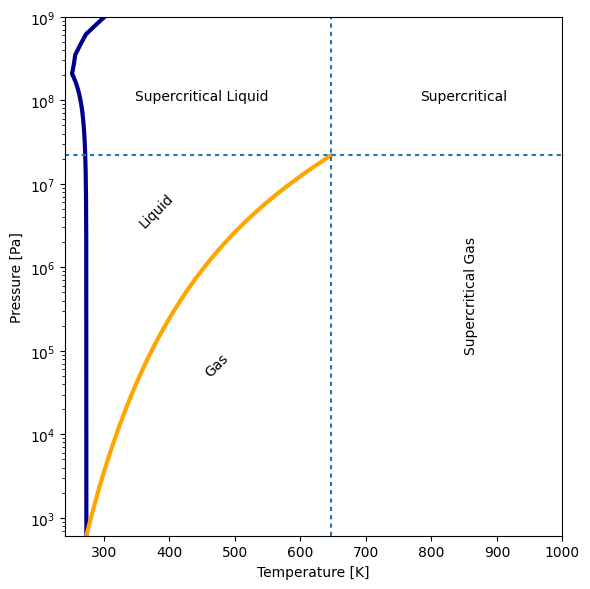

In [ ]:
import matplotlib
import numpy as np
import CoolProp as CP
import matplotlib.pyplot as plt
import scipy.interpolate

Water = CP.AbstractState("HEOS", "Water")
pc = Water.keyed_output(CP.iP_critical)
Tc = Water.keyed_output(CP.iT_critical)
Tmin = 200
Tmax = 1000
pmax = Water.keyed_output(CP.iP_max)
pt = 611.657
Tt = 273.16
fillcolor = 'g'

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
lw = 3

# --------------
# Melting curve
# --------------
melt_args = dict(lw = lw, solid_capstyle = 'round')
TT = []
PP = list(np.logspace(np.log10(pt), np.log10(pmax),1000))
for p in PP:
    TT.append(Water.melting_line(CP.iT, CP.iP, p))

#Zone VI
for T in np.linspace(max(TT), 355):
    TT.append(T)
    theta = T/273.31
    pi = 1-1.07476*(1-theta**4.6)
    p = pi*632.4e6
    PP.append(p)

plt.plot(TT,PP,'darkblue',**melt_args)

# ----------------
# Saturation curve
# ----------------
Ts = np.linspace(273.16, Tc, 1000)
ps = CP.CoolProp.PropsSI('P','T',Ts,'Q',0,'Water')

# ------
# Labels
# ------

plt.plot(Ts,ps,'orange',lw = lw, solid_capstyle = 'round')

# Critical lines
plt.axvline(Tc, dashes = [2, 2])
plt.axhline(pc, dashes = [2, 2])

# Labels
plt.text(850, 1e8, 'Supercritical',ha= 'center')
plt.text(850, 1e5, 'Supercritical Gas', rotation = 90)
plt.text(450, 1e8, 'Supercritical Liquid', rotation = 0, ha = 'center')
plt.text(350, 3e6, 'Liquid', rotation = 45)
plt.text(450, 5e4, 'Gas', rotation = 45)

plt.ylim(611,1e9)
plt.gca().set_yscale('log')
plt.gca().set_xlim(240, 1000)
plt.ylabel('Pressure [Pa]')
plt.xlabel('Temperature [K]')
plt.tight_layout()

(0.0001, 50.0, 0.001, 700.0)

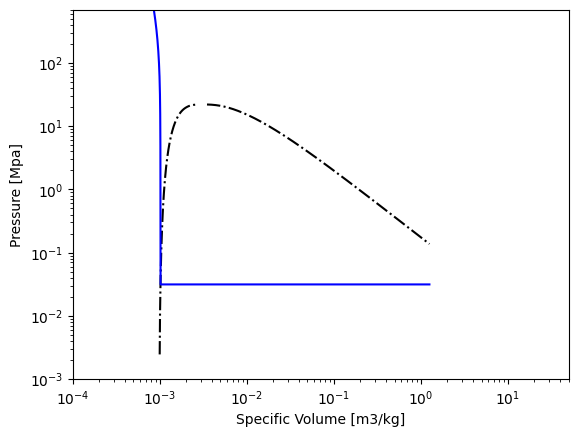

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.Plots import PropertyPlot



specific_volume= np.logspace (-100, .1, 100000)
density= 1/ specific_volume

# Constant temperature line at 400 C
T1=70.183+273.15
P1=CP.PropsSI('P', 'D', density, 'Q' , 1, 'water')
P2=CP.PropsSI('P', 'D', density, 'Q' , 0, 'water')

plt.loglog(specific_volume, P1/1e6, linestyle="dashdot", color='black')
plt.loglog(specific_volume, P2/1e6, linestyle="dashdot", color='black')

P3=CP.PropsSI('P', 'D', density, 'T' ,T1 , 'water')
plt.loglog(specific_volume, P3/1e6, color= "blue")



plt.xlabel("Specific Volume [m3/kg]")
plt.ylabel("Pressure [Mpa]")

plt.axis([1e-4, 50 , 1e-3, 700])
#plt.scatter(0.28 , P_a/1e6, color= "black")
#plt.annotate("(a)", (0.28 , (P_a/1e6)-0.15), ha='center', color= "black")
#plt.annotate("T  = 90 C", (1e-3 , 0.5e2), ha='left', color= "blue", rotation=-85)


#plt.scatter(1/D_b , 700000/1e6, color= "black")
#plt.annotate("(1)", (density , (700000/1e6)), ha='right', color= "black")


In [ ]:
specific_volume= np.logspace (-10, .1, 1000)
specific_volume


array([1.00000000e-10, 1.02355247e-10, 1.04765966e-10, 1.07233463e-10,
       1.09759076e-10, 1.12344173e-10, 1.14990155e-10, 1.17698457e-10,
       1.20470547e-10, 1.23307925e-10, 1.26212131e-10, 1.29184739e-10,
       1.32227358e-10, 1.35341639e-10, 1.38529269e-10, 1.41791975e-10,
       1.45131526e-10, 1.48549732e-10, 1.52048445e-10, 1.55629561e-10,
       1.59295021e-10, 1.63046812e-10, 1.66886967e-10, 1.70817567e-10,
       1.74840743e-10, 1.78958674e-10, 1.83173592e-10, 1.87487783e-10,
       1.91903583e-10, 1.96423386e-10, 2.01049642e-10, 2.05784857e-10,
       2.10631598e-10, 2.15592493e-10, 2.20670228e-10, 2.25867557e-10,
       2.31187295e-10, 2.36632327e-10, 2.42205602e-10, 2.47910142e-10,
       2.53749038e-10, 2.59725454e-10, 2.65842630e-10, 2.72103880e-10,
       2.78512598e-10, 2.85072258e-10, 2.91786413e-10, 2.98658703e-10,
       3.05692853e-10, 3.12892674e-10, 3.20262069e-10, 3.27805032e-10,
       3.35525649e-10, 3.43428107e-10, 3.51516687e-10, 3.59795772e-10,
      